# Cross Validation

#### Let's get our dataset and important libraries

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [76]:
# save filepath to variable for easier access
melbourne_file_path = '../hitchhikersGuideToMachineLearning/home-data-for-ml-course/train.csv'
# read the data and store data in DataFrame titled melbourne_data
train_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
#dropping the missing values
cols_with_missing = [col for col in train_data.columns
                     if train_data[col].isnull().any()]

train_data = train_data.drop(cols_with_missing, axis=1)


### Select target variable and then Split the data in training and validation set

In [78]:
X = train_data.drop(['SalePrice'] , axis =1)
y = train_data.SalePrice

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [79]:
#Splitting in training and Validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

In [80]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        from sklearn.preprocessing import LabelEncoder
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [81]:
def robustlabelencoder(train,test):
    object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

    label_enc = LabelEncoderExt()
    #cols = catVar2(train)
    #print(cols)
    for col in object_cols:
        label_enc.fit(train[col])
        train[col] = label_enc.transform(train[col])
        test[col] = label_enc.transform(test[col])
        
    #print(train.shape,test.shape)
    
    return train,test


In [82]:
#apply robust label encoder
Robustlabel_X_train,Robustlabel_X_valid = robustlabelencoder(X_train.copy(),X_valid.copy())


#### We are all set to LAUNCH!

##### In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function.

In [83]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(Robustlabel_X_train, y_train)
model.score(Robustlabel_X_valid, y_valid)

0.8980002776087193

###### Now lets see some cross validation code but before that we will have to deal with the ccategorical variable present in "X". 

In [84]:
object_cols = [col for col in X.columns if X[col].dtype == "object"]

label_enc = LabelEncoderExt()
    #cols = catVar2(train)
    #print(cols)
for col in object_cols:
        label_enc.fit(X[col])
        X[col] = label_enc.transform(X[col])
        

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a  RandomForestRegressor on dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [85]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.86861804, 0.84753182, 0.87983751, 0.88676293, 0.80775201])

The mean score and the 95% confidence interval of the score estimate are hence given by:



In [86]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.06)


So this result tells that our model will perform with  86 percent accuracy on unseen data.

By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:
SKLearn metrics contains alot of methods for evaluting our model for classification and regression.

In [87]:
from sklearn import metrics
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores

array([0.86861804, 0.84753182, 0.87983751, 0.88676293, 0.80775201])

###### Using other techniques
It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:

In [88]:
#SHufflSPLit technique
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model, X, y, cv=cv)

array([0.86824417, 0.87975986, 0.84836993, 0.82429914, 0.85634868])

###### One can also develop his custom technique
Another option is to use an iterable yielding (train, test) splits as arrays of indices, for example:

In [89]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1
custom_cv = custom_cv_2folds(X)
cross_val_score(model, X, y, cv=custom_cv)

array([0.97899126, 0.97925182])

###### Metrics for model evaluation
The cross_validate function and multiple metric evaluation are a bit diffrent!
The cross_validate function differs from cross_val_score in two ways:

* It allows specifying multiple metrics for evaluation.

* It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted     estimators) in addition to the test score.


In [91]:
from sklearn.model_selection import cross_validate
scoring = ['r2', 'neg_mean_absolute_error']
scores = cross_validate(model, X, y, scoring=scoring)
sorted(scores.keys())


['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_r2']

In [19]:
scores['test_r2']

array([0.86861804, 0.84753182, 0.87983751, 0.88676293, 0.80775201])

In [20]:
-1*scores['test_neg_mean_absolute_error']

array([17641.68123288, 16946.3214726 , 17620.64003425, 16217.0894863 ,
       19017.31414384])

In [21]:
scores['fit_time']

array([1.52309036, 1.47976112, 1.66367841, 1.70168567, 1.70510292])

In [22]:
scores['score_time']

array([0.01192379, 0.01169586, 0.01332021, 0.01349425, 0.01223159])

 ###### K-fold
KFold divides all the samples in  groups of samples, called folds (if , this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using  folds, and the fold left out is used for test.

Example of 4-fold cross-validation on the dataset:

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
cross_val_score(model, X, y, cv=kf)

###### Repeated K-Fold
RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

Example of 3-fold K-Fold repeated 2 times:

In [92]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=666)
cross_val_score(model, X, y, cv=kf)

array([0.88751083, 0.84789938, 0.86973553, 0.81748814])

###### Leave One Out (LOO)
LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [34]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
#cross_val_score(model, X, y, cv=loo,scoring='neg_mean_absolute_error' )


It will take forever to run as it only leaves one out (pun intended!).
It's better to see some small examples on how exactly dataset is being divided.

In [36]:
X = [1, 2, 3, 4]
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


###### Leave P Out (LPO)
LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing  samples from the complete set. For  samples, this produces train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>&gt;</mo>
  <mn>1</mn>
</math>.

Example of Leave-2-Out on a dataset with 4 samples:

In [42]:
from sklearn.model_selection import LeavePOut
X = X = [1, 2, 3, 4,5]
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


In above example What is the number of foldes that we get?
<sup align=left> n</sup>C<sub align=right>r</sub> 
that is 
<sup align=left> 5</sup>C<sub align=right>2</sub>    

###### ShuffleSplit
Random permutations cross-validation a.k.a. Shuffle & Split

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

Here is a usage example:


In [45]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
for train_index, test_index in ss.split(X):
         print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


###### Stratified k-fold
StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Here is an example of stratified 3-fold cross-validation on a dataset with 50 samples from two unbalanced classes. We show the number of samples in each class and compare with KFold.



In [47]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
#numpy. hstack() function is used to stack the sequence of input arrays horizontally 
#(i.e. column wise) to make a single array.


skf = StratifiedKFold(n_splits=3) #will create three folds
for train, test in skf.split(X, y):
         print('train -  {}   |   test -  {}'.format(np.bincount(y[train]), np.bincount(y[test])))
#bincount() method is used to count the frequency of each element


train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


###### Cross-validation iterators for grouped data.

It is used when there is  grouping of data is present. An example would be when there is medical data collected from multiple patients, with multiple samples taken from each patient. And such data is likely to be dependent on the individual group. In our example, the patient id for each sample will be its group identifier.

In this case we would like to know if a model trained on a particular set of groups generalizes well to the unseen groups. To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the paired training fold.

The following cross-validation splitters can be used to do that. The grouping identifier for the samples is specified via the groups parameter.

######  Group k-fold
GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

Imagine you have three subjects, each with an associated number from 1 to 3:

In [48]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
       print("%s %s" % (train, test))


[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


###### Time Series Split
TimeSeriesSplit is a variation of k-fold which returns first  folds as train set and the  th fold as test set. Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model.

This class can be used to cross-validate time series data samples that are observed at fixed time intervals.

Example of 3-split time series cross-validation on a dataset with 6 samples:



In [52]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(X):
      print("%s %s" % (train, test))


TimeSeriesSplit(max_train_size=None, n_splits=3)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


###### Enough Code! What can i Do with all these techniques 

Cross validation and model selection
Cross validation iterators can also be used to directly perform model selection using Grid Search for the optimal hyperparameters of the model. This is the topic of the next section: Tuning the hyper-parameters of an estimator.

In [53]:
def get_score(n):
   
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    
    scores = -1*cross_val_score(model, X, y,cv=3,scoring='neg_mean_absolute_error')
    return (sum(scores)/len(scores))

In [64]:
results={}
for i in [25,50,75,100,250,500]:
    results[i] = get_score(i)
    
results 


{25: 2.0844444444444448,
 50: 2.054444444444444,
 75: 2.0296296296296297,
 100: 2.035,
 250: 2.0366666666666666,
 500: 2.0354444444444444}

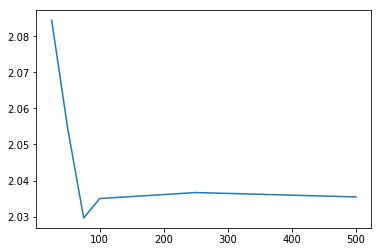

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results.keys(), results.values())
plt.show()

n=75 looks like the best answer!

And this is not the only reason to use Cros validation!
I have breifly explained few other reasons in the Conclusion of the article! <Link>